<a href="https://colab.research.google.com/github/aleksejalex/expert-octo-eureka/blob/main/RADcv_Assignment_1_Gaj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RADcv - 1. zápočtová úloha
Aleksej Gaj
(vypracováno v Pythonu)

Zadání:

## Popis úlohy

V tomto úkolu je cílem provést předzpracování datového souboru, jeho vizualizaci a jednoduchou lineární regresní úlohu, kde se budeme zajímat o ceny nemovitostí. Za tímto účelem využijeme datový set *saratosa_hoouses* z knihovny *moderndive* obsahující výběr 1057 domů.

## načtení knihoven, definice flastních fcí

In [2]:
# updating packages ... NOT NECESSARY
!pip install pip --upgrade
!pip install numpy --upgrade
!pip install scipy --upgrade
!pip install pandas --upgrade
!pip install seaborn --upgrade
!pip install csv --upgrade
!pip install pprint --upgrade
!pip install matplotlib --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.1 MB 7.9 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 288.2/288.2 kB 10.1 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.11.2
    Uninstalling seaborn-0.11.2:
      Successfully uninstalled seaborn-0.11.2
Looking in indexes: https://pypi.org/simple, https://us-python.pk

In [122]:
# importy balicku
import inspect
import numpy as np
import pandas as pd
import seaborn as sbn
import csv
import matplotlib as mpt
import statsmodels.api as sm
from matplotlib import pyplot as plt


def retrieve_name(var):
    callers_local_vars = inspect.currentframe().f_back.f_locals.items()
    return [var_name for var_name, var_val in callers_local_vars if var_val is var]


examplevarr = 4
print(examplevarr)
print(retrieve_name(examplevarr))

4
['examplevarr']


In [81]:
# additional settings for plotting images:
plt.rcParams.update({"figure.dpi": 130})   # increase DPI, default = 96
#%config InlineBackend.figure_format = "svg"  # every plot (matplotlib's or seaborn's) must be a SVG image

## nahrání datasetu
dataset snažen z https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses

Načten do notebooku pomocí kopie na GitHubu

In [82]:
# import datasetu (pomoci Pandas)
# (puvodne dataset byl stazen z >>  https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses  )
url = "https://raw.githubusercontent.com/aleksejalex/expert-octo-eureka/main/dataset_saratoga_houses_from_R.csv"
data = pd.read_csv(url)

data
#data.info

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms,heating,fuel,sewer,waterfront,newConstruction,centralAir
0,132500,0.09,42,50000,906,35,2,1,1.0,5,electric,electric,septic,No,No,No
1,181115,0.92,0,22300,1953,51,3,0,2.5,6,hot water/steam,gas,septic,No,No,No
2,109000,0.19,133,7300,1944,51,4,1,1.0,8,hot water/steam,gas,public/commercial,No,No,No
3,155000,0.41,13,18700,1944,51,3,1,1.5,5,hot air,gas,septic,No,No,No
4,86060,0.11,0,15000,840,51,2,0,1.0,3,hot air,gas,public/commercial,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1723,289000,0.38,32,24200,2310,61,5,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1724,285000,0.94,37,36200,2564,61,4,1,2.5,11,hot water/steam,gas,public/commercial,No,No,No
1725,194900,0.39,9,20400,1099,51,2,0,1.0,3,hot air,gas,public/commercial,No,No,No
1726,125000,0.24,48,16800,1225,51,3,1,1.0,7,hot air,gas,public/commercial,No,No,No


## popis dat:

A data frame with 1728 observations on the following 16 variables.

* `price` price (1000s of US dollars)

* `lotSize` size of lot (square feet)

* `age` age of house (years)

* `landValue` value of land (1000s of US dollars)

* `livingArea` living are (square feet)

* `pctCollege` percent of neighborhood that graduated college

* `bedrooms` number of bedrooms

* `firplaces` number of fireplaces

* `bathrooms` number of bathrooms (half bathrooms have no shower or tub)

* `rooms` number of rooms

* `heating` type of heating system

* `fuel` fuel used for heating

* `sewer` type of sewer system

* `waterfront` whether property includes waterfront

* `newConstruction` whether the property is a new construction

* `centralAir` whether the house has central air

Převzato z >>>   https://r-data.pmagunia.com/dataset/r-dataset-package-mosaicdata-saratogahouses

## Otázka 01

Zjistěte, zdali data neobsahují chybějící hodnoty *NA*. Pokud ano, tak rozhodněte zdali můžete příslušná pozorování z dat odstranit a proč. Které proměnné jsou kvantitativní a které kvalitativní? Jeli možno některé zařadit do obou skupin, pro kterou byste se rozhodli? Které proměnné je možné pužít jako faktorové ordinální a jaké jako faktorové nominální a proč? Spočtěte základní statistiky pro jednotlivé proměnné.

In [83]:
nan_in_data = data.isnull().sum().sum()
print('Number of NaN values in dataframe: ' + str(nan_in_data))

Number of NaN values in dataframe: 0


In [84]:
# totez lze videt z 
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   price            1728 non-null   int64  
 1   lotSize          1728 non-null   float64
 2   age              1728 non-null   int64  
 3   landValue        1728 non-null   int64  
 4   livingArea       1728 non-null   int64  
 5   pctCollege       1728 non-null   int64  
 6   bedrooms         1728 non-null   int64  
 7   fireplaces       1728 non-null   int64  
 8   bathrooms        1728 non-null   float64
 9   rooms            1728 non-null   int64  
 10  heating          1728 non-null   object 
 11  fuel             1728 non-null   object 
 12  sewer            1728 non-null   object 
 13  waterfront       1728 non-null   object 
 14  newConstruction  1728 non-null   object 
 15  centralAir       1728 non-null   object 
dtypes: float64(2), int64(8), object(6)
memory usage: 216.1+ KB
N


Kvalitativní proměnné: \\
`heating` \\
`fuel` \\
`sewer` \\
`waterfront` \\
`newConstruction` \\
`centralAir` \\

Kvantitativní proměnné: \\
`price` \\
`lotSize` \\
`age` \\
`landValue` \\
`livingArea` \\
`pctCollege` \\

"Obojetné" proměnné: \\
`bedrooms` \\
`fireplaces` \\
`bathrooms` \\
`rooms` \\








### Základní statistiky

In [86]:
#print(data.describe())
data.describe()

,price,lotSize,age,landValue,livingArea,pctCollege,bedrooms,fireplaces,bathrooms,rooms
count,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000,1728.000000
mean,211966.705440,0.500214,27.916088,34557.187500,1754.975694,55.567708,3.154514,0.601852,1.900174,7.041667
std,98441.391015,0.698680,29.209988,35021.168056,619.935553,10.333581,0.817351,0.556102,0.658352,2.316453
min,5000.000000,0.000000,0.000000,200.000000,616.000000,20.000000,1.000000,0.000000,0.000000,2.000000
25%,145000.000000,0.170000,13.000000,15100.000000,1300.000000,52.000000,3.000000,0.000000,1.500000,5.000000
50%,189900.000000,0.370000,19.000000,25000.000000,1634.500000,57.000000,3.000000,1.000000,2.000000,7.000000
75%,259000.000000,0.540000,34.000000,40200.000000,2137.750000,64.000000,4.000000,1.000000,2.500000,8.250000
max,775000.000000,12.200000,225.000000,412600.000000,5228.000000,82.000000,7.000000,4.000000,4.500000,12.000000


## Otázka 02

Chceme koupit nemovitost v zahraničí a průzkumem trhu jsme obdřeli předchozí data set *saratoga_houses*. Jelikož ale máme přesnější požadavky a nerozumíme imperiálním jednotkám, potřebujeme data upravit:

* Převeďte cenu nemovitostí z dolarů na koruny v tisících a plochu pozemku a obytnou plochu z akrů a čtverečích stop na $m^2$. (chceck describtion by *? saratoga_houses*) 
* Vyberte jen nemovitosti starší 10 let a mladší 50 let, jejichž cena je menší než 7500000 Kč, a plocha pozemku je mezi 500 a 5000 $m^2$.
* Počet koupelen a počet pokojů převeďte na faktorové proměnné o 3 úrovních.

**Dále pracujte jen s takto omezeným datasetem a s proměnnýma *cena*, *plocha_obytna*, *plocha_pozemku* *pocet_pokoju*,*stari_domu*, *pocet_koupelen*, *krb*.**

### "Přeložení" dat do nového dataframu `data_cz` 

In [90]:
data_cz = pd.DataFrame()
data_cz['cena'] = data.price * 24.96     # kurz k 20221019, ceny byly v tisicich uz v USD
data_cz['plocha_pozemku'] = data.lotSize * 4046.86  # acres to m2
data_cz['plocha_obytna'] = data.livingArea * 0.09290304  # square ft to m2
data_cz['pocet_pokoju'] = data.bedrooms
data_cz['stari_domu'] = data.age
data_cz['pocet_koupelen'] = data.bathrooms
data_cz['pocet_loznic'] = data.bedrooms
data_cz['krb'] = data.fireplaces

data_cz

,cena,plocha_pozemku,plocha_obytna,pocet_pokoju,stari_domu,pocet_koupelen,pocet_loznic,krb
0,3307200.0,364.2174,84.170154,2,42,1.0,2,1
1,4520630.4,3723.1112,181.439637,3,0,2.5,3,0
2,2720640.0,768.9034,180.603510,4,133,1.0,4,1
3,3868800.0,1659.2126,180.603510,3,13,1.5,3,1
4,2148057.6,445.1546,78.038554,2,0,1.0,2,0
...,...,...,...,...,...,...,...,...
1723,7213440.0,1537.8068,214.606022,5,32,2.5,5,1
1724,7113600.0,3804.0484,238.203395,4,37,2.5,4,1
1725,4864704.0,1578.2754,102.100441,2,9,1.0,2,0
1726,3120000.0,971.2464,113.806224,3,48,1.0,3,1


### Kopírování dat do nového dataframu `data_cz_factorization` pro následnou faktorizaci některých proměnných

In [27]:
data_cz_factorization = pd.DataFrame()
data_cz_factorization['cena'] = data_cz.cena
data_cz_factorization['plocha_pozemku'] = data_cz.plocha_pozemku
data_cz_factorization['plocha_obytna'] = data_cz.plocha_obytna
data_cz_factorization['stari_domu'] = data_cz.stari_domu
data_cz_factorization['krb'] = data_cz.krb

           cena  plocha_pozemku  plocha_obytna  stari_domu  krb
0     3307200.0        364.2174      84.170154          42    1
1     4520630.4       3723.1112     181.439637           0    0
2     2720640.0        768.9034     180.603510         133    1
3     3868800.0       1659.2126     180.603510          13    1
4     2148057.6        445.1546      78.038554           0    0
...         ...             ...            ...         ...  ...
1723  7213440.0       1537.8068     214.606022          32    1
1724  7113600.0       3804.0484     238.203395          37    1
1725  4864704.0       1578.2754     102.100441           9    0
1726  3120000.0        971.2464     113.806224          48    1
1727  2778048.0       2387.6474     181.997055          86    0

[1728 rows x 5 columns]


In [28]:
data_cz_factorization['pocet_koupelen'] = data_cz.pocet_koupelen
data_cz_factorization['pocet_pokoju'] = data_cz.pocet_pokoju
data_cz_factorization['pocet_loznic'] = data_cz.pocet_loznic

### faktorizace poctu koupelen (3 urovne)

In [29]:
# faktorizace poctu koupelen - do 3 kategorii
# kriterium: interval od nejmensiho poctu do nejvetsiho rozdelen na 3 ekvidistantni intervaly
#            nasledne cislo je prirazeno na zaklade toho, do ktereho intervalu dana nemovitost spadla

pomocna_df = pd.DataFrame(pd.Categorical(np.asarray(list(pd.cut(data_cz['pocet_koupelen'], bins = 3)))))
#radek vyse:
#   1. rozdeli pocet_koupelen na intervalky, vrati promennou categorical
#   2. ulozim jako list
#   3. ulozim jako np.array
#   4. udelam z toho categorical promennou (ne, rovnou pouzit vystup fce pd.cut z nejakeho duvodu neslo)
#   5. udelam z toho pd.dataframe
pomocna_df.columns = ['intervalky']
#   6. pojmenuji sloupec, abych k nemu mohl mit pristup
data_cz_factorization['pocet_koupelen_faktor'] = pomocna_df['intervalky']
#   7. vysledek vlozim do hlavniho dataframu
data_cz_factorization['pocet_koupelen_faktor'] = data_cz_factorization['pocet_koupelen_faktor'].apply(lambda x: pd.factorize(x)[0])
#   8. provedu faktorizaci, tzn kazdemu prvku, ktery potka poprve, priradi int o jedna vetsi nez predchozimu
data_cz_factorization.pocet_koupelen_faktor = pd.to_numeric(data_cz_factorization.pocet_koupelen_faktor, errors='coerce')
#   9. cisla, ziskana faktorizaci v bodu 8. jsou int, ale maji typ pd.categorical, takze konvertuji je na integery
print(data_cz_factorization)
#   10. podivam se na vysledek (pro jistotu)
del(pomocna_df)
#   11. smazu nepotrebnou promennou pro pripad pozdejsiho pouziti stejneho nazvu...

           cena  plocha_pozemku  plocha_obytna  stari_domu  krb  \
0     3307200.0        364.2174      84.170154          42    1   
1     4520630.4       3723.1112     181.439637           0    0   
2     2720640.0        768.9034     180.603510         133    1   
3     3868800.0       1659.2126     180.603510          13    1   
4     2148057.6        445.1546      78.038554           0    0   
...         ...             ...            ...         ...  ...   
1723  7213440.0       1537.8068     214.606022          32    1   
1724  7113600.0       3804.0484     238.203395          37    1   
1725  4864704.0       1578.2754     102.100441           9    0   
1726  3120000.0        971.2464     113.806224          48    1   
1727  2778048.0       2387.6474     181.997055          86    0   

      pocet_koupelen  pocet_pokoju  pocet_koupelen_faktor  
0                1.0             2                      0  
1                2.5             3                      1  
2              

### faktorizace poctu pokoju (3 urovne)

In [30]:
# faktorizace poctu pokoju - do 3 kategorii
# POZOR - vse je naprosto stejne, jako v pri faktorizaci poctu koupelen - viz vyse (proto jiz bez komentaru)

pomocna_df = pd.DataFrame(pd.Categorical(np.asarray(list(pd.cut(data_cz['pocet_pokoju'], bins = 3)))))
#radek vyse:
#   1. rozdeli pocet_pokoju na intervalky, vrati promennou categorical
#   2. ulozim jako list
#   3. ulozim jako np.array
#   4. udelam z toho categorical promennou (ne, rovnou pouzit vystup fce pd.cut z nejakeho duvodu neslo)
#   5. udelam z toho pd.dataframe
pomocna_df.columns = ['intervalky']
#   6. pojmenuji sloupec, abych k nemu mohl mit pristup
data_cz_factorization['pocet_pokoju_faktor'] = pomocna_df['intervalky']
#   7. vysledek vlozim do hlavniho dataframu
data_cz_factorization['pocet_pokoju_faktor'] = data_cz_factorization['pocet_pokoju_faktor'].apply(lambda x: pd.factorize(x)[0])
#   8. provedu faktorizaci, tzn kazdemu prvku, ktery potka poprve, priradi int o jedna vetsi nez predchozimu
data_cz_factorization.pocet_pokoju_faktor = pd.to_numeric(data_cz_factorization.pocet_pokoju_faktor, errors='coerce')
#   9. cisla, ziskana faktorizaci v bodu 8. jsou int, ale maji typ pd.categorical, takze konvertuji je na integery
print(data_cz_factorization)
#   10. podivam se na vysledek (pro jistotu)
del(pomocna_df)
#   11. smazu nepotrebnou promennou pro pripad pozdejsiho pouziti stejneho nazvu...

           cena  plocha_pozemku  plocha_obytna  stari_domu  krb  \
0     3307200.0        364.2174      84.170154          42    1   
1     4520630.4       3723.1112     181.439637           0    0   
2     2720640.0        768.9034     180.603510         133    1   
3     3868800.0       1659.2126     180.603510          13    1   
4     2148057.6        445.1546      78.038554           0    0   
...         ...             ...            ...         ...  ...   
1723  7213440.0       1537.8068     214.606022          32    1   
1724  7113600.0       3804.0484     238.203395          37    1   
1725  4864704.0       1578.2754     102.100441           9    0   
1726  3120000.0        971.2464     113.806224          48    1   
1727  2778048.0       2387.6474     181.997055          86    0   

      pocet_koupelen  pocet_pokoju  pocet_koupelen_faktor  pocet_pokoju_faktor  
0                1.0             2                      0                    0  
1                2.5             

### Zkopírování dat do nového dataframu `data_cz_cut` a následné oříznutí dat dle zadání

In [92]:
data_cz_cut = pd.DataFrame()
data_cz_cut['cena'] = data_cz_factorization.cena
data_cz_cut['plocha_pozemku'] = data_cz_factorization.plocha_pozemku
data_cz_cut['plocha_obytna'] = data_cz_factorization.plocha_obytna
data_cz_cut['stari_domu'] = data_cz_factorization.stari_domu
data_cz_cut['krb'] = data_cz_factorization.krb
data_cz_cut['pocet_pokoju'] = data_cz_factorization.pocet_pokoju
data_cz_cut['pocet_koupelen'] = data_cz_factorization.pocet_koupelen
data_cz_cut['pocet_loznic'] = data_cz.pocet_loznic
data_cz_cut['pocet_pokoju_faktor'] = data_cz_factorization.pocet_pokoju_faktor
data_cz_cut['pocet_koupelen_faktor'] = data_cz_factorization.pocet_koupelen_faktor

In [93]:
data_cz_cut = data_cz_cut[data_cz_cut['stari_domu']>10]
data_cz_cut = data_cz_cut[data_cz_cut['stari_domu']<50]

data_cz_cut = data_cz_cut[data_cz_cut['cena']<7500000]
data_cz_cut = data_cz_cut[data_cz_cut['plocha_pozemku']<5000]
data_cz_cut = data_cz_cut[data_cz_cut['plocha_pozemku']>50]

Jak vypadají oříznutá data:

In [95]:
# volba dat, se kterymi dal budeme pracovat. lze dle potreby zamenit za:
#   data ... importovany dataset
#   data_cz ... pouze koverze, ale bez faktorizace koupelen a pokoju
#   data_cz_factorization ... totez co data_cz ale s faktorizaci
#   data_cz_cut ... totez co data_cz_factorization, ale jen  
#                      starsi 10 let a mladší 50 let, 
#                      jejichž cena je menší než 7500000 Kč, a plocha pozemku je mezi 500 a 5000  m2
curr_data = data_cz_cut
curr_data

curr_data.head()


,cena,plocha_pozemku,plocha_obytna,stari_domu,krb,pocet_pokoju,pocet_koupelen,pocet_loznic,pocet_pokoju_faktor,pocet_koupelen_faktor
0,3307200.0,364.2174,84.170154,42,1,2,1.0,2,0,0
3,3868800.0,1659.2126,180.603510,13,1,3,1.5,3,0,0
5,2995200.0,2751.8648,107.024302,31,1,4,1.0,4,1,0
6,3818880.0,1618.7440,255.669166,33,1,4,1.5,4,1,0
7,4243200.0,4896.7006,154.404852,23,1,4,1.5,4,1,0


In [96]:
curr_data.describe()

,cena,plocha_pozemku,plocha_obytna,stari_domu,krb,pocet_pokoju,pocet_koupelen,pocet_loznic,pocet_pokoju_faktor,pocet_koupelen_faktor
count,1.015000e+03,1015.00000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000,1015.000000
mean,4.430829e+06,1546.61819,148.178152,24.066995,0.594089,3.054187,1.762562,3.054187,0.260099,0.428571
std,1.307082e+06,1000.96111,44.262713,9.280074,0.524324,0.800653,0.572872,0.800653,0.445594,0.520366
min,2.570880e+05,80.93720,59.457946,11.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000
25%,3.469440e+06,647.49760,117.893958,17.000000,0.000000,3.000000,1.500000,3.000000,0.000000,0.000000
50%,4.318080e+06,1416.40100,142.141651,20.000000,1.000000,3.000000,1.500000,3.000000,0.000000,0.000000
75%,5.353920e+06,2023.43000,174.332555,32.000000,1.000000,4.000000,2.500000,4.000000,1.000000,1.000000
max,7.488000e+06,4896.70060,334.822556,49.000000,2.000000,7.000000,3.500000,7.000000,2.000000,2.000000


## Otázka 03 

* Porovnejte průměry cen nemovitostí s krbem a bez krbu a otestujte, zdali na hladině významnosti $\alpha = 0.01$ je průměrná cena nemovitostí s krbem větší než průměrná cena nemovitostí bez krbu.

# Vizualizace dat

## Otázka 04 

* Vykreslete scatterploty pro všechny numerické proměnné, kde bude barevně rozlišeno, zdali se jedná o nemovitost s krbem, nebo bez krbu.
*  Pro proměnné *pocet_pokoju* a *pocet_koupelen* a *krb* vykreslete krabicové diagramy (nebo violin ploty), kde odezvou bude *cena*.
* Pro proměnnou *cena* vykreslete histogram spolu s jádrovým odhadem hustoty.


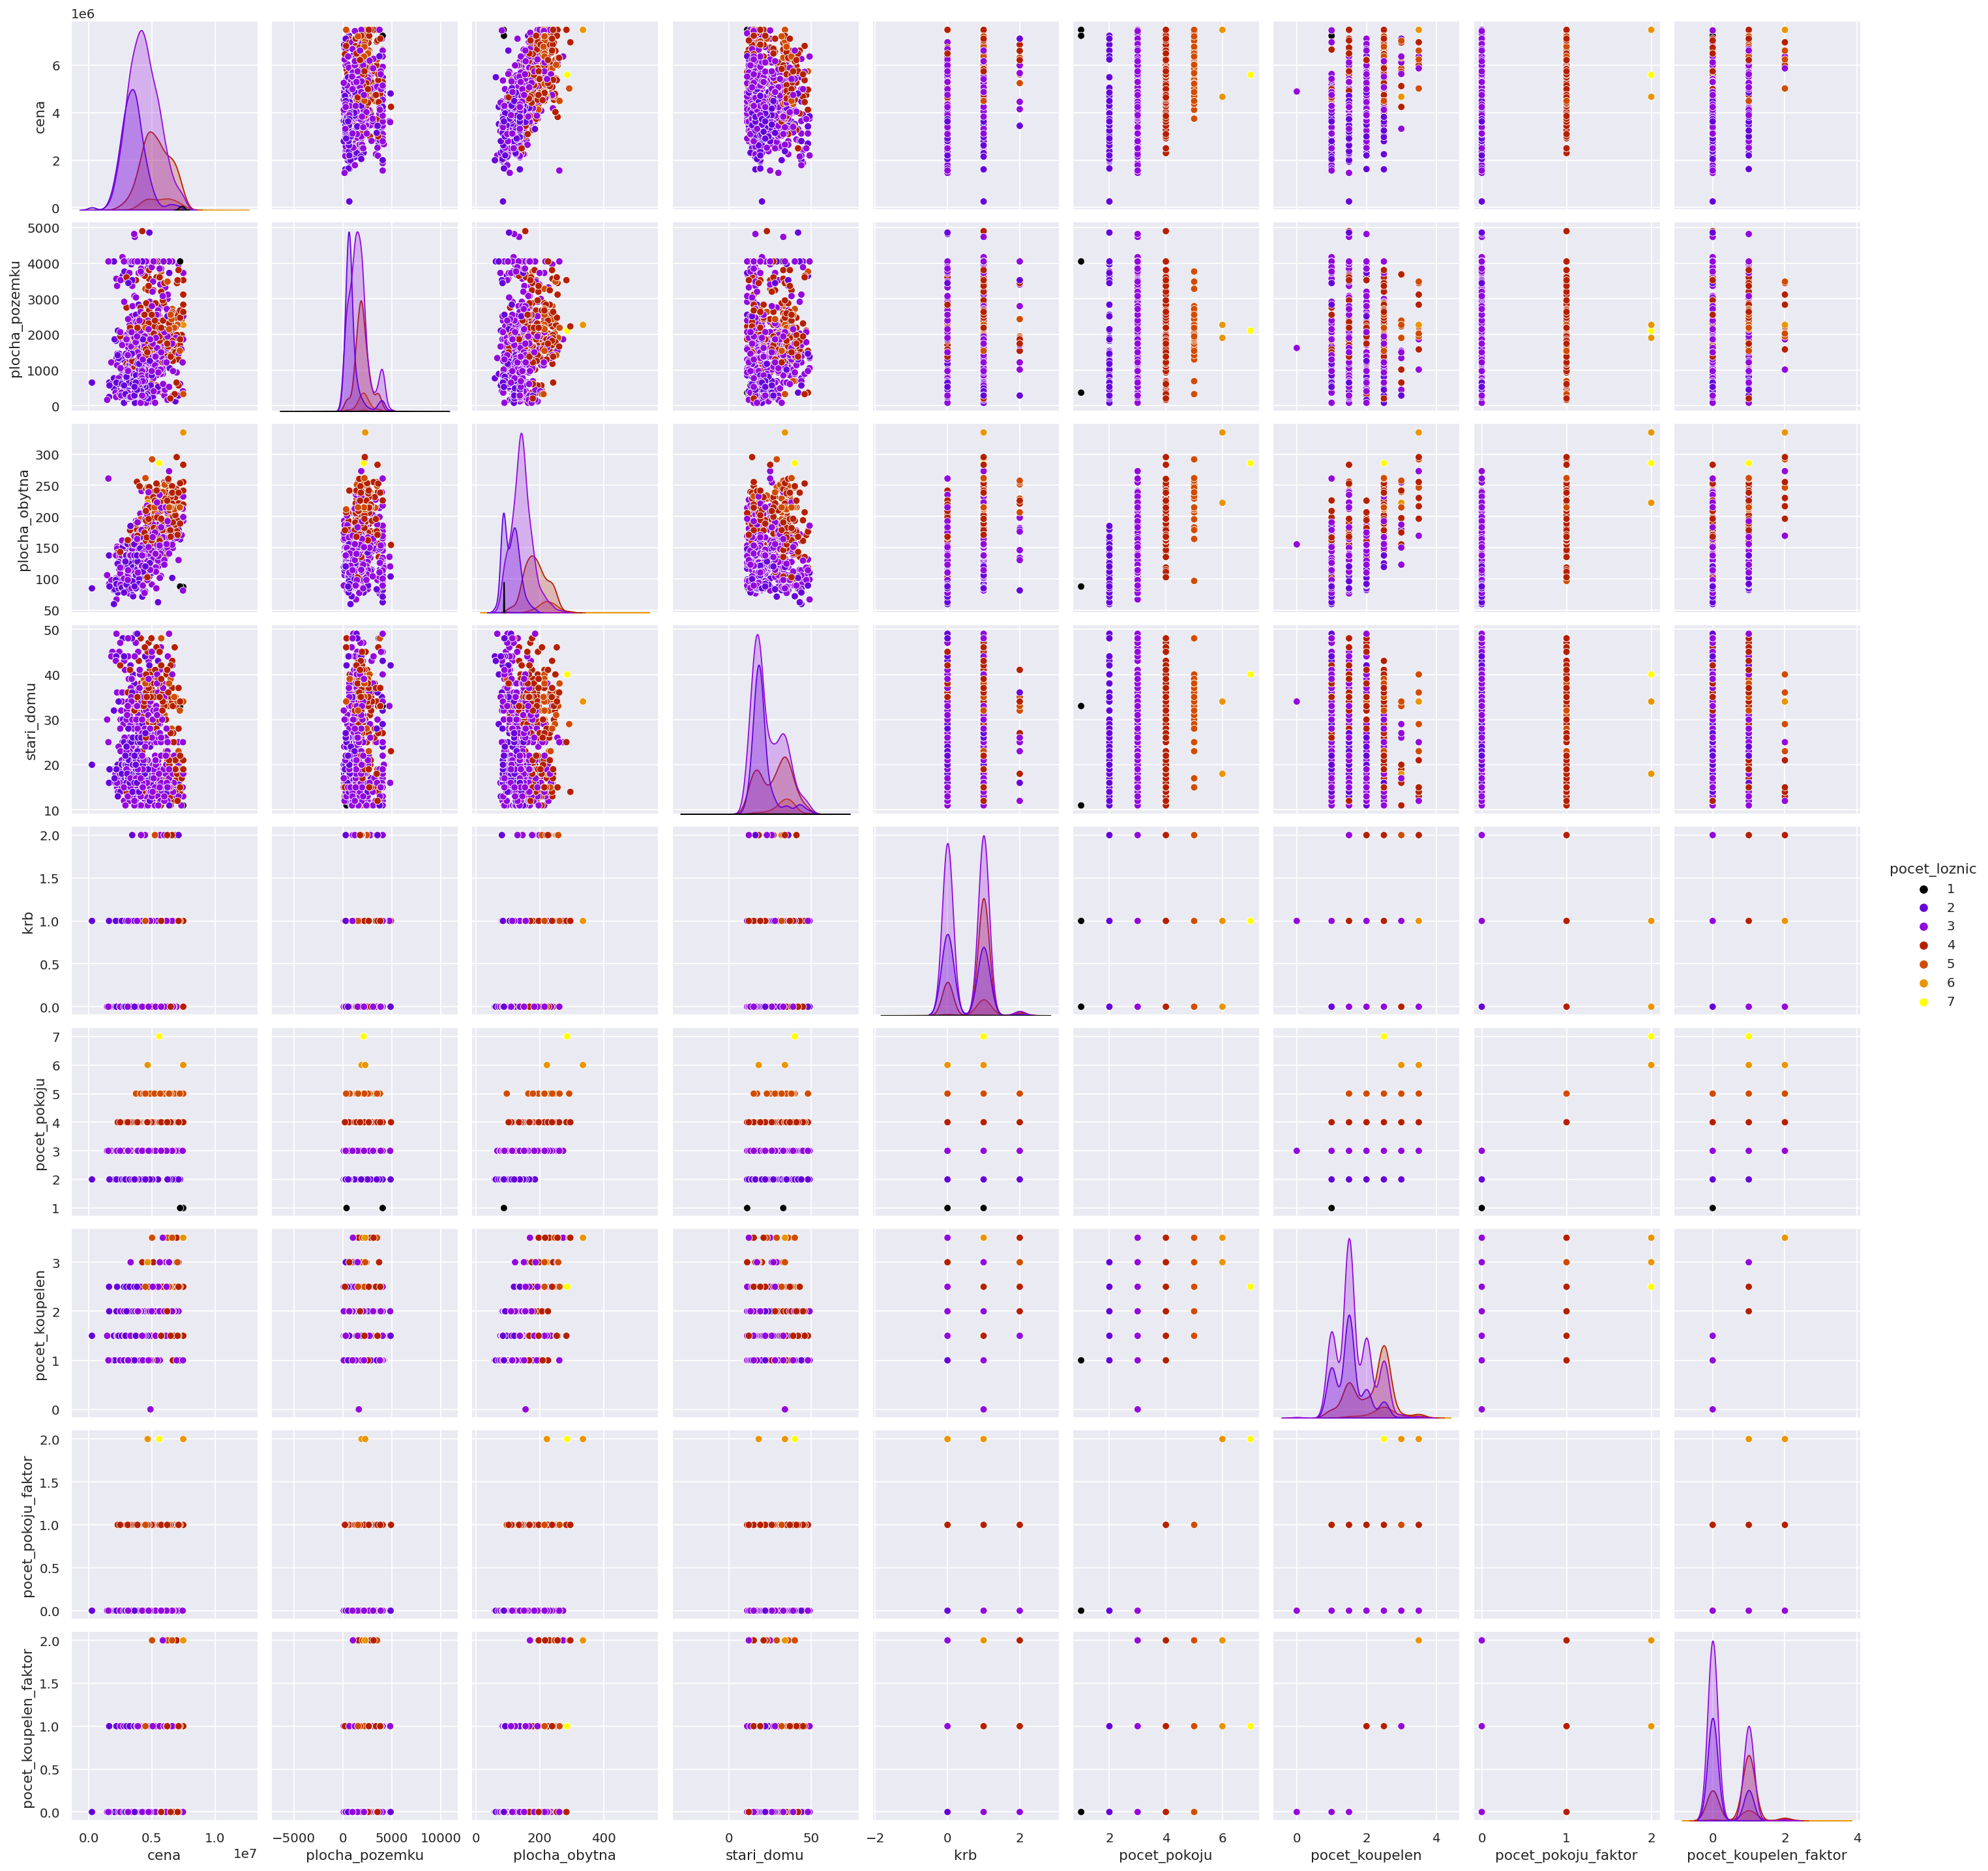

In [123]:
# MIMO zadani: pair plot pro prvnotni predstavu o datasetu
sbn.pairplot(curr_data, hue='pocet_loznic', palette='gnuplot')  # podle POCTU LOZNIC

Column Name :  cena


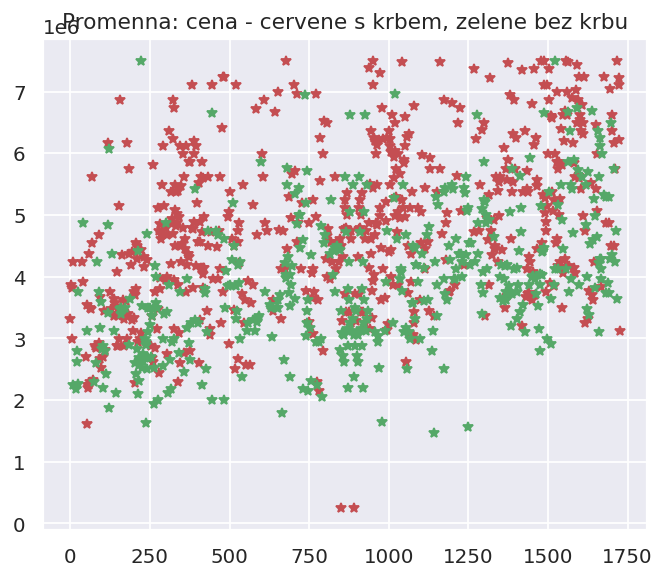

Column Name :  plocha_pozemku


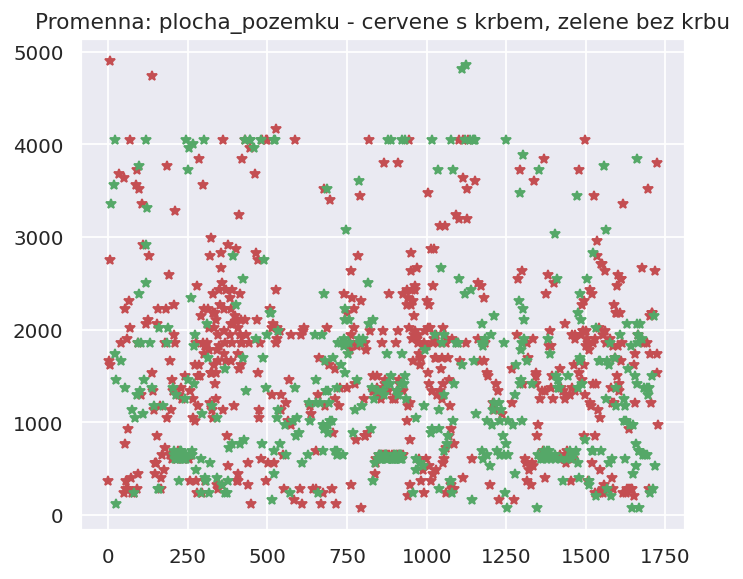

Column Name :  stari_domu


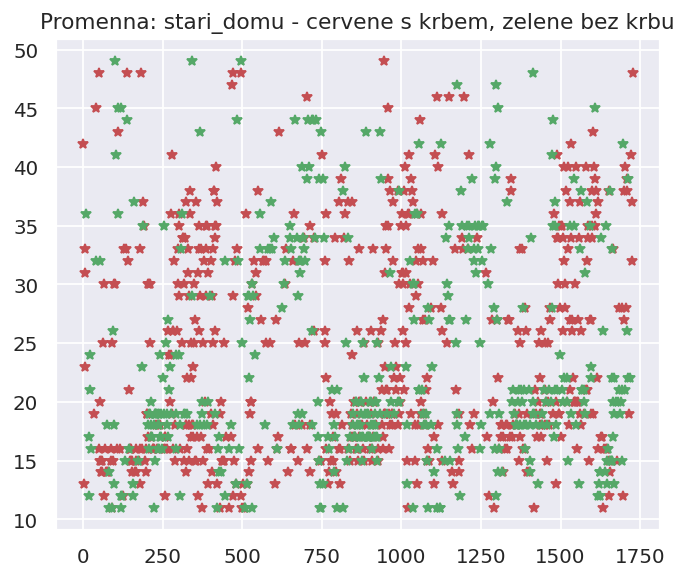

Column Name :  plocha_obytna


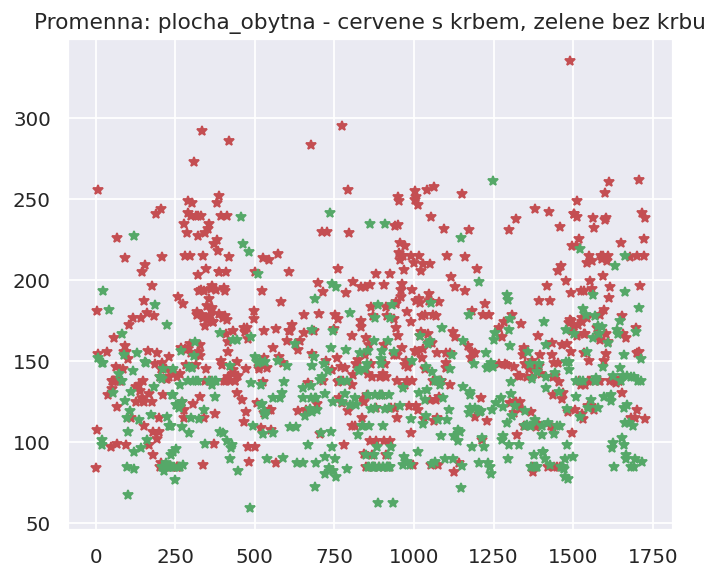

In [135]:
# tj. pro kazdou numerickou promennou jeden scatterplot se dvemi ploty: zelene bez krbu, cervene s krbem
# jelikoz nevim predem, kolik presne chci obrazku, musi byt 'pod sebou', nepouziji subplots

data_cz_s_krbem = curr_data[ (curr_data['krb']) != 0 ]   # vsechny info o vsech nemovitostech S KRBEM (jeden krb nebo i vice krbu)
data_cz_bez_krbu = curr_data[ (curr_data['krb']) == 0 ]   # vsechny info o vsech nemovitostech BEZ KRBU

#for column in data_cz:
for column in {'cena', 'plocha_pozemku', 'plocha_obytna', 'stari_domu'}: 
    # nema smysl vykreslovat pro kvalitativni promenne, ale lze (staci pouzit 'for' o radek vyse)
    columnSeriesObj = data_cz[column]
    print('Column Name : ', column)
    num_s_krbem = data_cz_s_krbem.loc[:, column]
    num_bez_krbu = data_cz_bez_krbu.loc[:, column]
    plt.figure(figsize=(6,5))
    plt.plot(num_s_krbem, 'r*')
    plt.plot(num_bez_krbu, 'g*')
    plt.title("Promenna: " + str(column) + " - cervene s krbem, zelene bez krbu")
    plt.show()

Zvláštní: zdá se, že staré domy spíš krb nemají, než mají.

### violin ploty a boxploty pro cenu 

Poznámka: počet ložnic a počet krbů nebyl faktorizován, narozdíl od počtu pokojů a počtu koupelen.

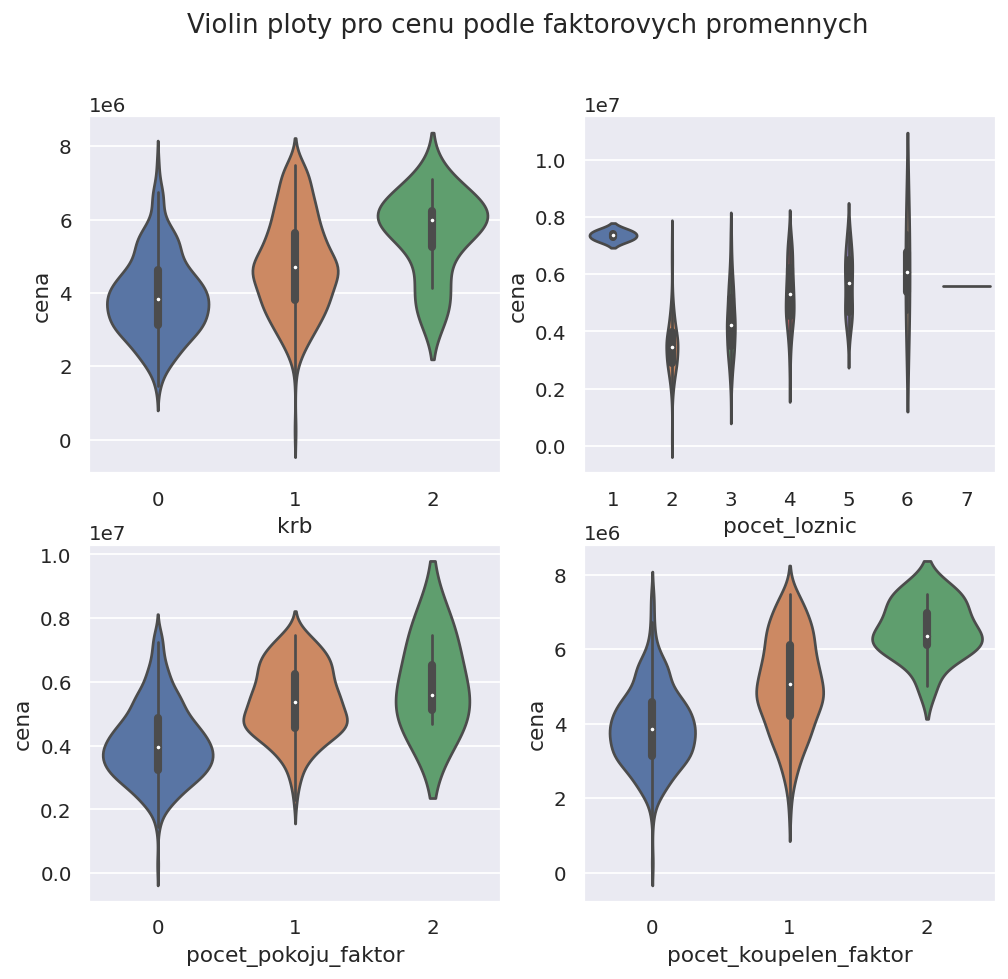

In [112]:
#plt.figure(figsize=(8,6))
fig, axs = plt.subplots(2, 2, figsize =(9, 8))
sbn.violinplot( x = curr_data["krb"], y = curr_data["cena"], ax = axs[0,0])
sbn.violinplot( x = curr_data["pocet_loznic"], y = curr_data["cena"], ax = axs[0,1])
sbn.violinplot( x = curr_data["pocet_pokoju_faktor"], y = curr_data["cena"] , ax = axs[1,0])
sbn.violinplot( x = curr_data["pocet_koupelen_faktor"], y = curr_data["cena"] , ax = axs[1,1])

fig.suptitle("Violin ploty pro cenu podle faktorovych promennych")
fig.show()

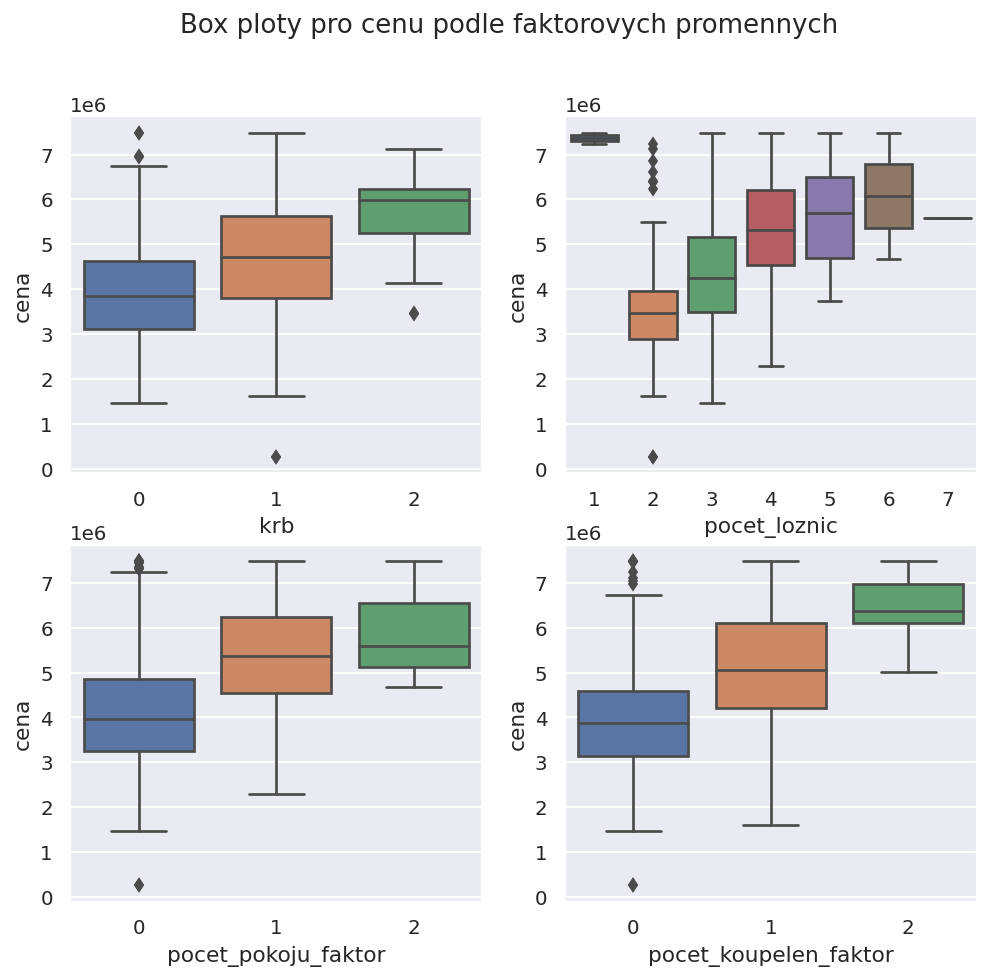

In [113]:
# boxploty (na stejnych datech jako violin ploty vyse)
fig, axs = plt.subplots(2, 2, figsize =(9, 8))
sbn.boxplot( x = curr_data["krb"], y = curr_data["cena"], ax = axs[0,0])
sbn.boxplot( x = curr_data["pocet_loznic"], y = curr_data["cena"], ax = axs[0,1])
sbn.boxplot( x = curr_data["pocet_pokoju_faktor"], y = curr_data["cena"] , ax = axs[1,0])
sbn.boxplot( x = curr_data["pocet_koupelen_faktor"], y = curr_data["cena"] , ax = axs[1,1])

fig.suptitle("Box ploty pro cenu podle faktorovych promennych")
fig.show()

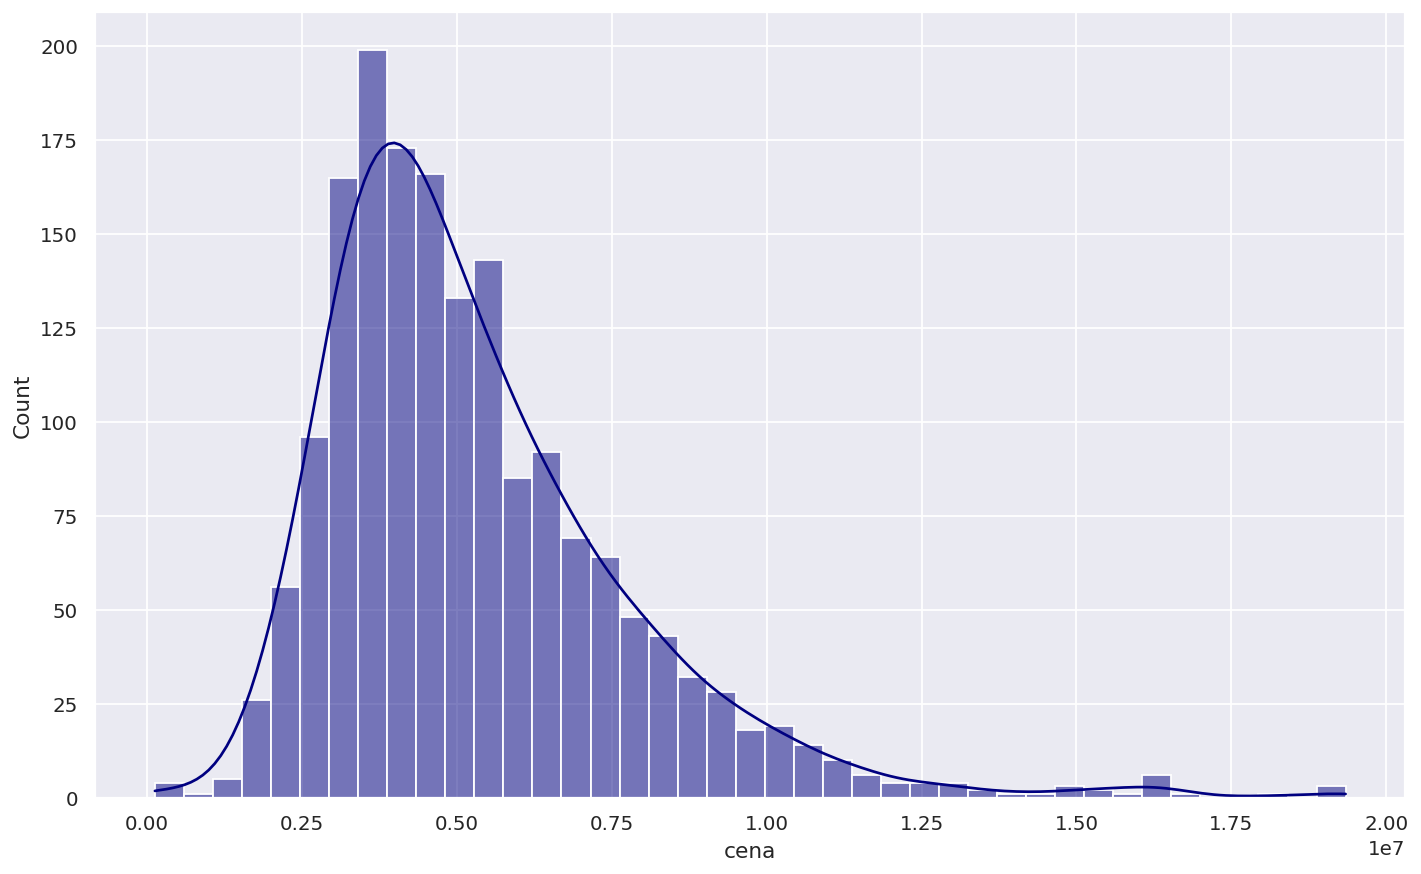

In [73]:
# pro promennou cena - histogram s jadrovym odhadem hustoty
#sns.histplot(data = score_data,x = 'score',color = 'navy',kde = True)
# (inspired by >> https://www.sharpsightlabs.com/blog/seaborn-histogram/ )

sbn.set(rc={"figure.figsize":(13, 8)}) #width=6, height=5
sbn.histplot(data = curr_data.cena, color = 'navy', kde = True)  # Gaussian kernel by default


## Otázka 05

Pro kombinace faktorizovaných proměnných *pocet_pokoju*, *pocet_koupelen*  vykreslete cenu nemovitosti, aby bylo na obrázku vidět, jestli se v průměru liší ceny nemovitostí majících více pokojů, nebo více koupelen a zdali jsou zastoupeny všechny kombiance všech úrovních pro dvě zmíněné faktorové proměnné.

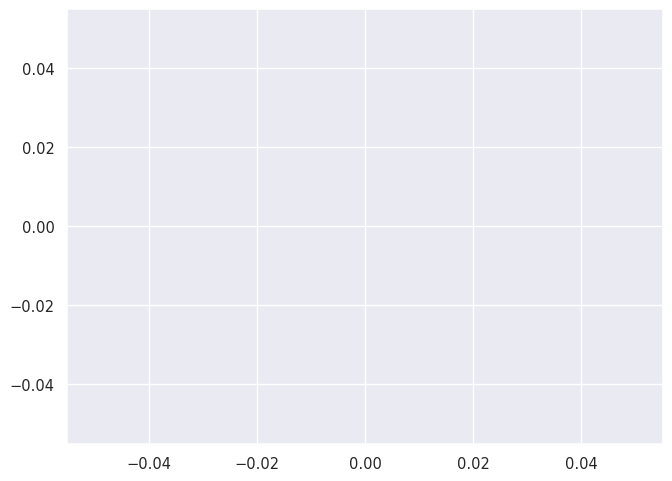

In [ ]:
plt.figure(figsize=(8,6))
plt.plot()
plt.show()

## Otázka 06

Pro nemovitosti s dvěma ložnicema vykreslete závislost ceny na obytné ploše nemovitosti, kde jednotlivé události označíte barvou podle toho zdali mají krb a velikost bodů v grafu bude odpovídat počtu koupelen (pro tuto úlohu je lepší vzít počet koupelen jako numerickou proměnnou).

**Dále pracujte jen s nemovitostmi se dvěma ložnicemi.**

In [120]:
# vyriznuti jen nemovitosti se dvema loznicemi
data_2_bedrooms = curr_data[curr_data['pocet_loznic']==2]
data_2_bedrooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 245 entries, 0 to 1717
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   cena                   245 non-null    float64
 1   plocha_pozemku         245 non-null    float64
 2   plocha_obytna          245 non-null    float64
 3   stari_domu             245 non-null    int64  
 4   krb                    245 non-null    int64  
 5   pocet_pokoju           245 non-null    int64  
 6   pocet_koupelen         245 non-null    float64
 7   pocet_loznic           245 non-null    int64  
 8   pocet_pokoju_faktor    245 non-null    int64  
 9   pocet_koupelen_faktor  245 non-null    int64  
dtypes: float64(4), int64(6)
memory usage: 21.1 KB


<Figure size 1430x910 with 0 Axes>

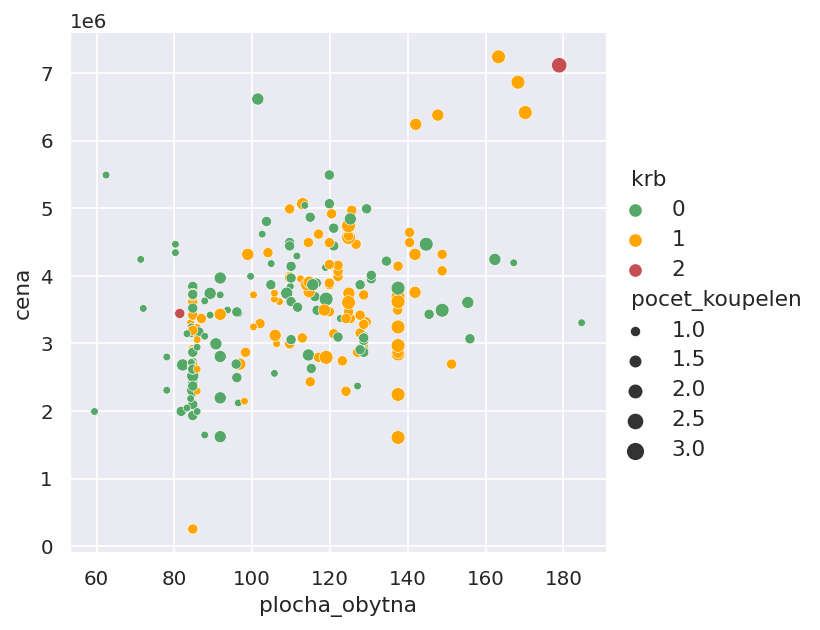

In [133]:
#sns.relplot( data=tips, x="total_bill", y="tip", col="time",  hue="time", size="size", style="sex", palette=["b", "r"], sizes=(10, 100) )

plt.figure(figsize=(11,7))
sbn.relplot(data = data_2_bedrooms, x='plocha_obytna', y = 'cena', hue = "krb", size="pocet_koupelen", palette=["g", "orange" , "r"])


# Jednoduchý lineární model

## Otázka 07

Sestavte jednoduchý regresní model (s i bez interceptu), kde vysvětlovaná proměnná
bude cena nemovitosti a vysvětlující obytná plocha.   Spočtěte pro oba modely $R^2$ a $F$ statistiky, co nám o modelech říkají. Vyberte jeden z nich a zdůvodněte proč ho preferujete.

Na základě zvoleného modelu odpovězte, zdali cena nemovitosti závisí na obytné ploše  a pokud ano, o kolik se změní očekávaná cena pro nemovitost s obytnou plochou zvětšenou o $20 m^2$? 

In [136]:
sm.OLS(data_2_bedrooms)

AttributeError: ignored

## Otázka 08
Sestavte jednoduchý linární model jako v předchozí otázce pro nemovitosti s krbem a bez krbu. Jaký model vykazuje silnější linearní vztah mezi cenou a obytnou plochou? O kolik cena s rostoucí obytnou plochou pro nemovitosti s krbem roste rychleji než pro nemovitosti bez krbu?

Spočtěte 95% konfidenční intervaly pro regresní koeficienty popisující sklon regresní přímky v obou modelech a zjistěte, zdali se protínají. Co z toho můžeme vyvozovat?

Na základě těchto modelů zjistěte o kolik procent bude mít průměrná nemovitost s krbem a obytnou plochou $160m^2$ vyšší očekávanou cenu než průměrná nemovitost o stejné obytné ploše, ale bez krbu.

## Otázka 09

Vykreslete scatterplot obytné plochy a ceny nemovitostí. Do tohoto grafu vykreslete regresní přímky vybraných modelů pro nemovitosti s krbem a bez něho, jednoltivé body i regresní přímky označte barvou podle toho k jaké skupině přísluší.

Sestrojte 90% konfidenční intervaly okolo očekávaných cen pro jednoltivé skupiny a na jejich základě rozhodněte, zdali a jak se očekávané ceny budou lišit pro nemovitosti s obytnou plochou menší než $120m^2$. Je to porovnávání správné? Zdůvoněte.

## Otázka 10

Vykreslete histogramy pro rezidua modelů z předchozí otázky. Proložte je hustotou normálního rozdělení s nulovou střední hodnotou a rozptylem odpovídajícím $\hat{\sigma}^2$ z jednotlivých modelů.

Co výsledný graf říka o n našich modelech a je toto ověření dostatečné pro validaci model?

Navrněte další úpravy modelu za cílem co nejlépe predikvoat cenu nemovitosti.

# KONEC UKOLU.

AttributeError: ignored

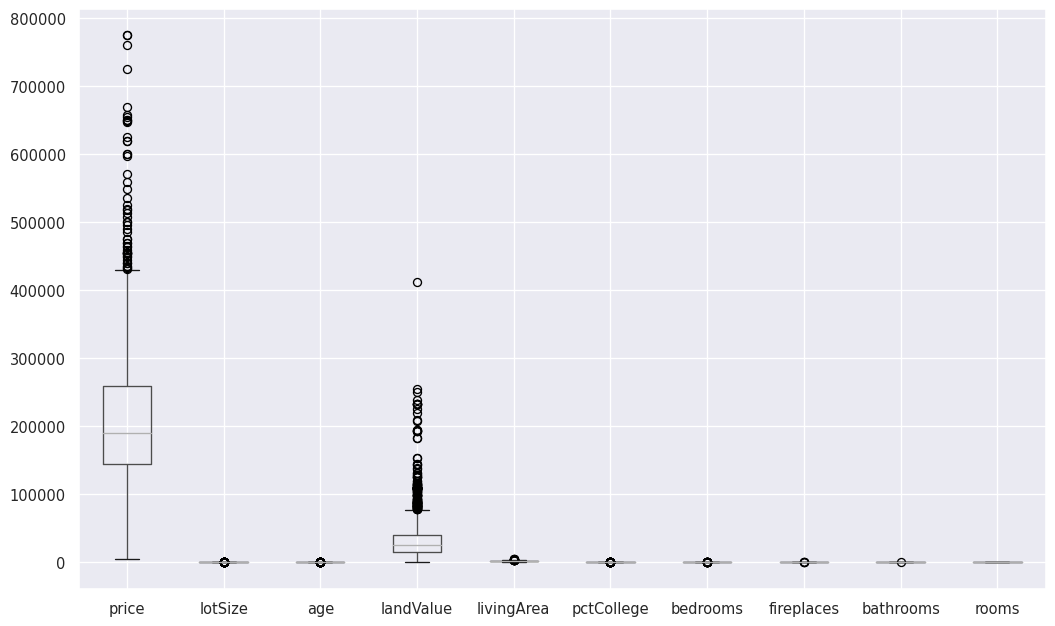

In [ ]:
pltbox = data.boxplot()
pltbox.show()

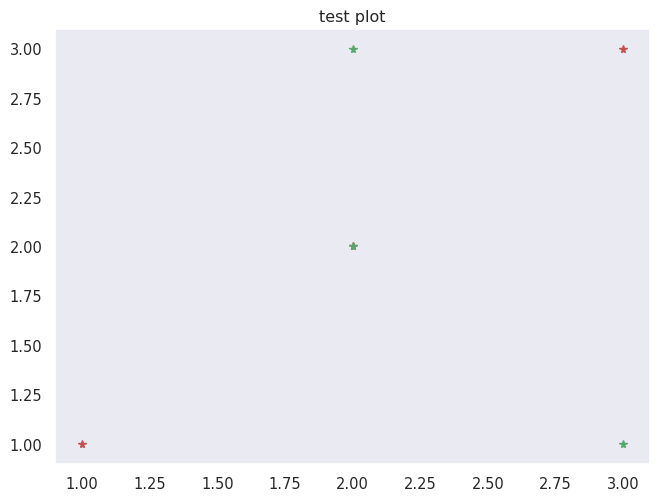

In [ ]:
plt.figure(figsize=(8,6))
plt.plot(np.array([1,2,3]), np.array([1,2,3]),'r*')
plt.plot(np.array([2,2,3]), np.array([3,2,1]),'g*')
plt.title('test plot')
plt.grid()
plt.show()

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00, 1.00000e+00,
        1.00000e+00, 0.00000e+00, 2.00000e+00, 0.00000e+00, 0.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 2.00000e+00, 2.00000e+00,
        1.00000e+00, 1.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        1.00000e+00, 3.00000e+00, 1.00000e+00, 2.00

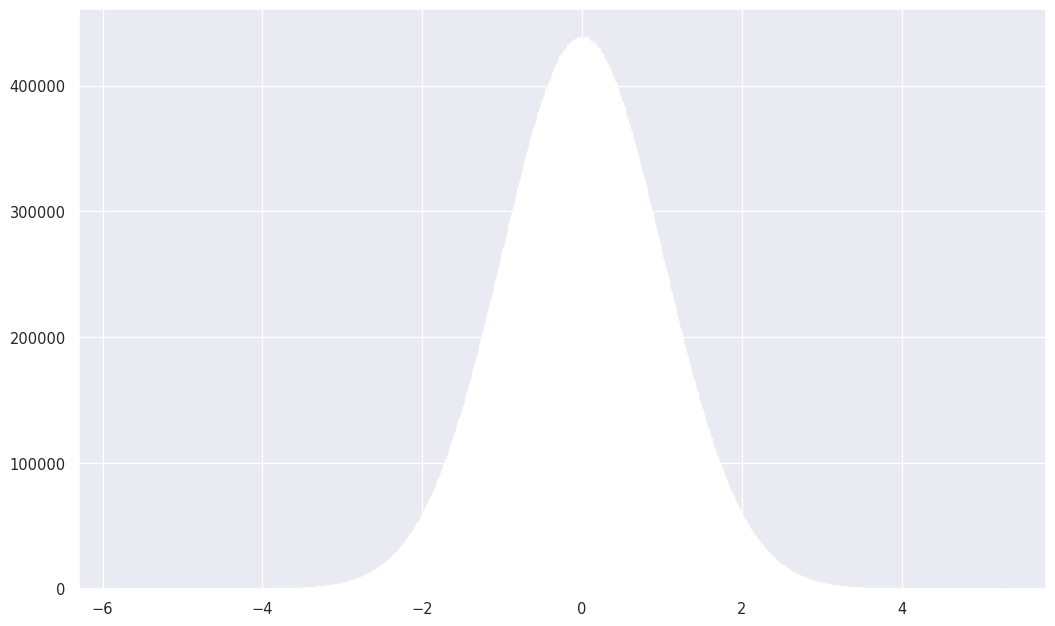

In [ ]:
np.linspace(1,20000,9000)   # returns np.array starting with 1 ending with 2 and with 900 values in between
a = np.linspace(1,20000,9000)
b = np.linspace(2,20000,90000)
c = np.linspace(3,20000,90000)
d = np.linspace(4,20000,90000)
f = np.random.normal(0,1,100000000)
#ff = np.random.normal(0,1,100000000)
#fff = np.random.normal(0,1,100000000)
#ffff = np.random.normal(0,1,100000000)
#fffff = np.random.normal(0,1,100000000)
e = np.random.normal(0,1,100000000)
#print(e)
plt.hist(e, 1000)

In [ ]:
workspace = dir()
print(workspace)

['In', 'Out', '_', '_11', '_12', '_15', '_19', '_3', '_6', '__', '___', '__builtin__', '__builtins__', '__doc__', '__loader__', '__name__', '__package__', '__spec__', '_dh', '_i', '_i1', '_i10', '_i11', '_i12', '_i13', '_i14', '_i15', '_i16', '_i17', '_i18', '_i19', '_i2', '_i20', '_i3', '_i4', '_i5', '_i6', '_i7', '_i8', '_i9', '_ih', '_ii', '_iii', '_oh', 'a', 'ax', 'ax_list', 'ax_np', 'az', 'b', 'b_df', 'c', 'column', 'columnSeriesObj', 'csv', 'd', 'data', 'data_cz', 'data_cz_bez_krbu', 'data_cz_factorization', 'data_cz_s_krbem', 'e', 'examplevarr', 'exit', 'f', 'ff', 'fff', 'ffff', 'fffff', 'get_ipython', 'inspect', 'mpt', 'nan_in_data', 'np', 'num_bez_krbu', 'num_s_krbem', 'pd', 'plt', 'pltbox', 'quit', 'retrieve_name', 'sbn', 'url']


In [ ]:
_i

'workspace = dir()\nprint(workspace)'

In [ ]:
whos

Variable                Type           Data/Info
------------------------------------------------
a                       ndarray        9000: 9000 elems, type `float64`, 72000 bytes
ax                      Series         0       (0.994, 3.0]\n1  <...> (3.0, 5.0] < (5.0, 7.0]]
ax_list                 list           n=1728
ax_np                   ndarray        1728: 1728 elems, type `object`, 13824 bytes
az                      Series         0       0\n1       0\n2  <...>ength: 1728, dtype: int64
b                       ndarray        90000: 90000 elems, type `float64`, 720000 bytes (703.125 kb)
b_df                    DataFrame              intervalky\n0    <...>\n[1728 rows x 1 columns]
c                       ndarray        90000: 90000 elems, type `float64`, 720000 bytes (703.125 kb)
column                  str            cena
columnSeriesObj         Series         0       3307200.0\n1     <...>gth: 1728, dtype: float64
csv                     module         <module 'csv' from '/u

# backups of old code - PROCEED WITH CAUTION

In [ ]:
ax = pd.cut(data_cz['pocet_pokoju'], bins = 3, retbins=True)

npax = np.asarray(ax)
from pprint import pprint
pprint(npax)
npax.__name__
print("\n\n\n")
print(npax)
print(type(npax))

array(<bound method Series.__array__ of 0       (0.994, 3.0]
1       (0.994, 3.0]
2         (3.0, 5.0]
3       (0.994, 3.0]
4       (0.994, 3.0]
            ...     
1723      (3.0, 5.0]
1724      (3.0, 5.0]
1725    (0.994, 3.0]
1726    (0.994, 3.0]
1727    (0.994, 3.0]
Name: pocet_pokoju, Length: 1728, dtype: category
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]>,
      dtype=object)


AttributeError: ignored

In [ ]:
# pokus 3
ax = pd.cut(data_cz['pocet_pokoju'], bins = 3)
print(ax)
print(type(ax))
# pd.to_numeric(data.agebin, errors='coerce')
ax = 


0       (0.994, 3.0]
1       (0.994, 3.0]
2         (3.0, 5.0]
3       (0.994, 3.0]
4       (0.994, 3.0]
            ...     
1723      (3.0, 5.0]
1724      (3.0, 5.0]
1725    (0.994, 3.0]
1726    (0.994, 3.0]
1727    (0.994, 3.0]
Name: pocet_pokoju, Length: 1728, dtype: category
Categories (3, interval[float64, right]): [(0.994, 3.0] < (3.0, 5.0] < (5.0, 7.0]]
<class 'pandas.core.series.Series'>


In [ ]:
# jak v Pythonu faktorizovat "spojite" veliciny:
#   https://benalexkeen.com/bucketing-continuous-variables-in-pandas/
print("data_cz_faktorization = \n")
print(data_cz_factorization)
print("\n\n\n")
#pd.cut(data_cz['cena'], 6)
faktorizace_podle_poctu_pokoju = pd.cut(data_cz['pocet_pokoju'], bins = 3, retbins=True) 


#faktorizace_podle_poctu_pokoju = pd.cut(data_cz['pocet_pokoju'], bins = 3, labels=["1","2","3"]) 
print(faktorizace_podle_poctu_pokoju)
print(type(faktorizace_podle_poctu_pokoju))
#print(faktorizace_podle_poctu_pokoju.to_numpy())
#faktorizace_podle_poctu_pokoju.loc['']
data_cz_factorization['pocet_pokoju'] = pd.cut(data_cz['pocet_pokoju'], faktorizace_podle_poctu_pokoju)
# df['chi'] = pd.cut(df['chi'], custom_bucket_array)
print(data_cz_factorization)

data_cz_faktorization = 

           cena  plocha_pozemku  plocha_obytna  stari_domu  pocet_koupelen  \
0     3307200.0        0.008361      84.170154          42               0   
1     4520630.4        0.085471     181.439637           0               1   
2     2720640.0        0.017652     180.603510         133               0   
3     3868800.0        0.038090     180.603510          13               2   
4     2148057.6        0.010219      78.038554           0               0   
...         ...             ...            ...         ...             ...   
1723  7213440.0        0.035303     214.606022          32               1   
1724  7113600.0        0.087329     238.203395          37               1   
1725  4864704.0        0.036232     102.100441           9               0   
1726  3120000.0        0.022297     113.806224          48               0   
1727  2778048.0        0.054813     181.997055          86               0   

      pocet_pokoju  krb  
0          

/usr/local/lib/python3.7/dist-packages/pandas/core/reshape/tile.py:280: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  bins = np.asarray(bins)


ValueError: ignored

In [ ]:
ax = pd.cut(data_cz['pocet_pokoju'], bins = 3)
ax_list = list(ax)
print(ax_list)
print(type(ax_list))
ax_np = np.asarray(ax_list)
print(ax_np)
print(type(ax_np))



[Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(3.0, 5.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(3.0, 5.0, closed='right'), Interval(3.0, 5.0, closed='right'), Interval(3.0, 5.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(5.0, 7.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(3.0, 5.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(0.994, 3.0, closed='right'), Interval(3.0, 5.0, closed='right'), Interval(0.994, 3.0, clos

In [ ]:
b = pd.Categorical(ax_np)
print(b)

b_df = pd.DataFrame(b)
b_df.columns = ['intervalky']
print(b_df)
data_cz_factorization['pocet_koupelen_faktor'] = b_df['intervalky']

data_cz_factorization['pocet_koupelen_faktor']  = data_cz_factorization['pocet_koupelen_faktor'].apply(lambda x: pd.factorize(x)[0])
print(data_cz_factorization['pocet_koupelen_faktor'])
data_cz_factorization.pocet_koupelen_faktor = pd.to_numeric(data_cz_factorization.pocet_koupelen_faktor, errors='coerce')
print(data_cz_factorization['pocet_koupelen_faktor'])
az = data_cz_factorization['pocet_koupelen_faktor']
#np.sum(data_cz_factorization['pocet_koupelen_faktor'])
#["malo_pokoju", "dost_pokoju", "hodne_pokoju"]

[(0.994, 3.0], (0.994, 3.0], (3.0, 5.0], (0.994, 3.0], (0.994, 3.0], ..., (3.0, 5.0], (3.0, 5.0], (0.994, 3.0], (0.994, 3.0], (0.994, 3.0]]
Length: 1728
Categories (3, interval[float64, right]): [(0.994, 3.0], (3.0, 5.0], (5.0, 7.0]]
        intervalky
0     (0.994, 3.0]
1     (0.994, 3.0]
2       (3.0, 5.0]
3     (0.994, 3.0]
4     (0.994, 3.0]
...            ...
1723    (3.0, 5.0]
1724    (3.0, 5.0]
1725  (0.994, 3.0]
1726  (0.994, 3.0]
1727  (0.994, 3.0]

[1728 rows x 1 columns]
0       0
1       0
2       1
3       0
4       0
       ..
1723    1
1724    1
1725    0
1726    0
1727    0
Name: pocet_koupelen_faktor, Length: 1728, dtype: category
Categories (3, int64): [0, 1, 2]
0       0
1       0
2       1
3       0
4       0
       ..
1723    1
1724    1
1725    0
1726    0
1727    0
Name: pocet_koupelen_faktor, Length: 1728, dtype: int64


0       1
1       0
2       1
3       1
4       0
       ..
1723    1
1724    1
1725    0
1726    1
1727    0
Name: krb, Length: 1728, dtype: int64


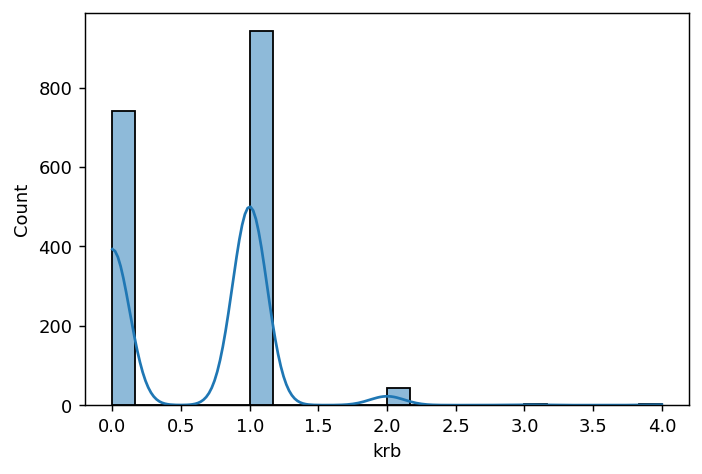

In [54]:
print(curr_data.krb)
sbn.histplot(curr_data.krb, kde=True)

In [ ]:
### BACKUP - stary zpusob faktorizace

# prevod poctu koupelen a poctu pokoju na faktorovou promennou

# navod:
#factorize conf and team columns only
#df[['conf', 'team']] = df[['conf', 'team']].apply(lambda x: pd.factorize(x)[0])

data_cz_factorization = pd.DataFrame()

data_cz_factorization['cena'] = data_cz.cena
data_cz_factorization['plocha_pozemku'] = data_cz.plocha_pozemku
data_cz_factorization['plocha_obytna'] = data_cz.plocha_obytna
data_cz_factorization['stari_domu'] = data_cz.stari_domu
#data_cz_factorization[['pocet_koupelen', 'pocet_pokoju']] = data_cz[['pocet_koupelen', 'pocet_pokoju']].apply(lambda x: pd.factorize(x)[0])
# v radku vyse je faktorizace, ktera si bere tolik 'kategorii', kolik je treba (tj. tolik, kolik je ruznych moznych hodnot)
#nize se prepise jinym zpusobem faktorizace, ktery uz bude odpovidat zadani ukolu.
data_cz_factorization['krb'] = data_cz.krb

print(data_cz_factorization)



In [51]:
# pomocne: jak cyklit pres nazvy sloupcu v dataframech
for column in curr_data:
    columnSeriesObj = curr_data[column]
    print('Column Name : ', column)
    print('Column Contents : ', columnSeriesObj.values)

Column Name :  cena
Column Contents :  [3307200.  4520630.4 2720640.  ... 4864704.  3120000.  2778048. ]
Column Name :  plocha_pozemku
Column Contents :  [0.00836127 0.0854708  0.01765158 ... 0.03623219 0.02229673 0.05481279]
Column Name :  plocha_obytna
Column Contents :  [ 84.17015424 181.43963712 180.60350976 ... 102.10044096 113.806224
 181.99705536]
Column Name :  stari_domu
Column Contents :  [ 42   0 133 ...   9  48  86]
Column Name :  krb
Column Contents :  [1 0 1 ... 0 1 0]
Column Name :  pocet_pokoju_faktor
Column Contents :  [0 0 1 ... 0 0 0]
Column Name :  pocet_koupelen_faktor
Column Contents :  [0 1 0 ... 0 0 0]
